In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("MBA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [3]:
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [4]:
#Dropping "admission" and "race" column because they have too many null values
df=df.drop(["admission","race"],axis=1)

df.isnull().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
gmat              0
work_exp          0
work_industry     0
dtype: int64

In [5]:
#Drop duplicate values in application_id
df=df.drop_duplicates(subset=["application_id"])

#Drop null rows
df = df.dropna(axis=0,how="all")

In [6]:
#Number of unique values in each attribute

for i in df.columns :
    print(f"Number of unique values in {i} attribute is : {df.nunique()[i]}")

Number of unique values in application_id attribute is : 6194
Number of unique values in gender attribute is : 2
Number of unique values in international attribute is : 2
Number of unique values in gpa attribute is : 101
Number of unique values in major attribute is : 3
Number of unique values in gmat attribute is : 22
Number of unique values in work_exp attribute is : 9
Number of unique values in work_industry attribute is : 14


In [7]:
df.head()

,application_id,gender,international,gpa,major,gmat,work_exp,work_industry
0,1,Female,False,3.30,Business,620.0,3.0,Financial Services
1,2,Male,False,3.28,Humanities,680.0,5.0,Investment Management
2,3,Female,True,3.30,Business,710.0,5.0,Technology
3,4,Male,False,3.47,STEM,690.0,6.0,Technology
4,5,Male,False,3.35,STEM,590.0,5.0,Consulting


In [8]:
#Finding outliers in numeric columns. Here, have found outliers by gpa.

outliers=[]
col="gpa"

Q1=df[col].quantile(0.25)
Q2=df[col].quantile(0.5)
Q3=df[col].quantile(0.75)
IQR = Q3-Q1
for i in df[col] :
    if (i>(Q3 +1.5*IQR)) or (i<(Q1-1.5*IQR)) :
        outliers.append(i)

print(f"In {col} column, there are {len(outliers)} outliers")




In gpa column, there are 44 outliers


## Univariate Analysis

#### 1. Categorical Data

(a.) Pie Chart

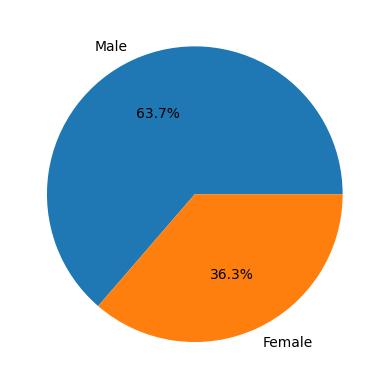

In [9]:
#Analysing distribution of MBA applicants according to gender

plt.pie(x=df.gender.value_counts(),autopct="%1.1f%%",labels=df.gender.value_counts().index)
plt.show()


#Inference: Male applicants for the MBA program is much greater (~1.75 times) than female applicats.

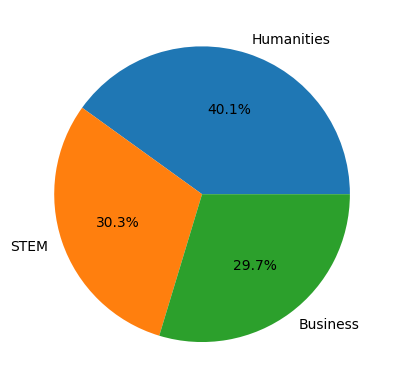

In [10]:
#Analysing distribution of MBA applicants according to Major
plt.pie(x=df.major.value_counts(),autopct="%1.1f%%",labels=df.major.value_counts().index)
plt.show()


#Inference : Applicants from Humanites background are greatest, followed by STEM and then Business.

(b.) Bar Plot

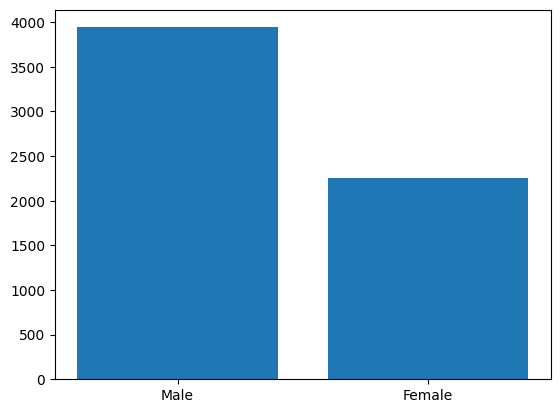

In [11]:
#Plotting Number of applications by gender
plt.bar(x=df["gender"].value_counts().index,height=df["gender"].value_counts())
plt.show()



#Inference : Around 4000 applicants were Male, and 2250 Female applicants were there from the MBA program.

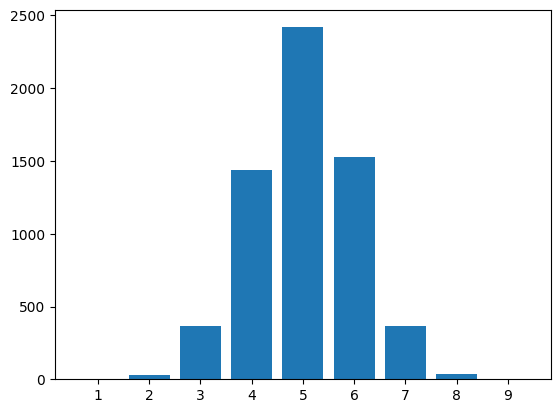

In [12]:
#Plotting Number of applications by Work Experience
plt.bar(x=df["work_exp"].value_counts().index,height=df["work_exp"].value_counts())
plt.xticks(df["work_exp"].unique())
plt.show()

#Inference : Maximum number of applicants are having 5 years of experience. 
#Almost no one is there of 1,8,or 9 years of experience

#### 2.) Numerical Data

(a.) Histogram and KDE plot

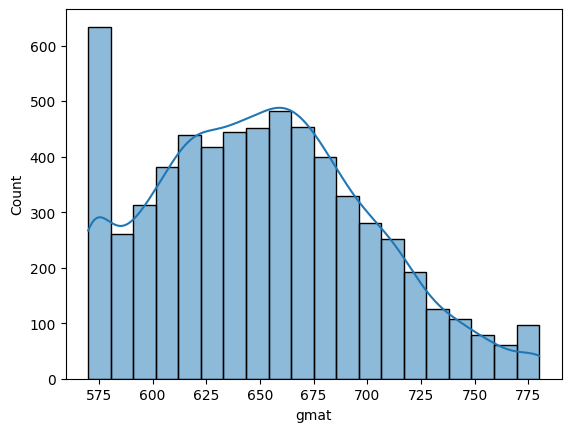

In [13]:
#Analysing number of applicants with respect to their GMAT Score

sns.histplot(df.gmat,bins=20,kde=True)
plt.xticks(range(575,800,25))
plt.show()

#Hence, the distribution of number-of-applicants wrt GMAT scores is bimodal. 
#Peaks occur around GMAT scores of 575 and 650.

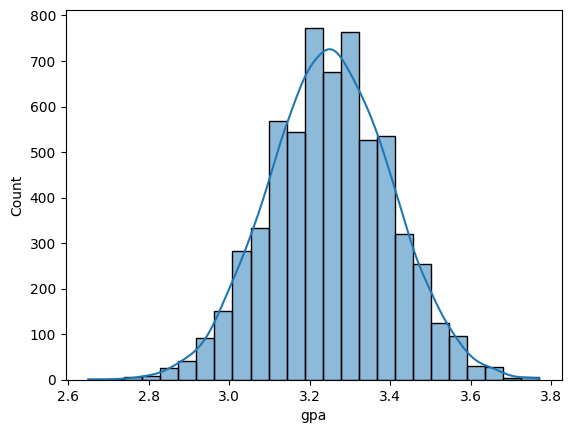

Skew of gpa column is -0.000894076614641035
Mean of gpa column is 3.2507135938004517
Stdev of gpa column is 0.15154111487341537


In [14]:
#Same, but according to GPA
sns.histplot(df.gpa,bins=25,kde=True)
plt.show()

print(f"Skew of gpa column is {df.gpa.skew()}")
print(f"Mean of gpa column is {df.gpa.mean()}")
print(f"Stdev of gpa column is {df.gpa.std()}")

#Inference : Number of applcants are almost normally distributed wrt gpa, with a mean = 3.25 and stdev = 0.15

(b.) Boxplot

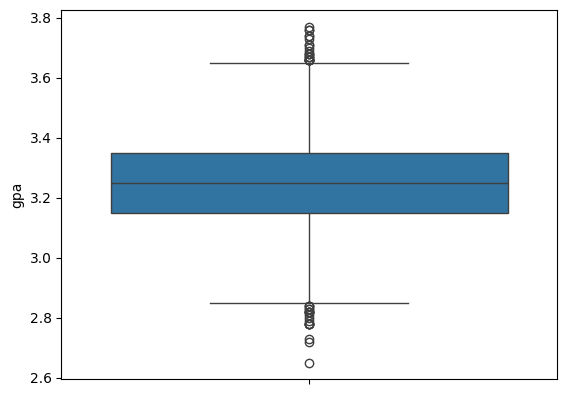

In [15]:
#Boxplot of applicants on basis of their GPA
sns.boxplot(df.gpa)
plt.show()

#Inference : Data outside range of gpa=[2.85,3.65] can be considered outliers.

## Bivariate Analysis

#### (1.) Numerical-Numerical

 (a.) Scatterplot

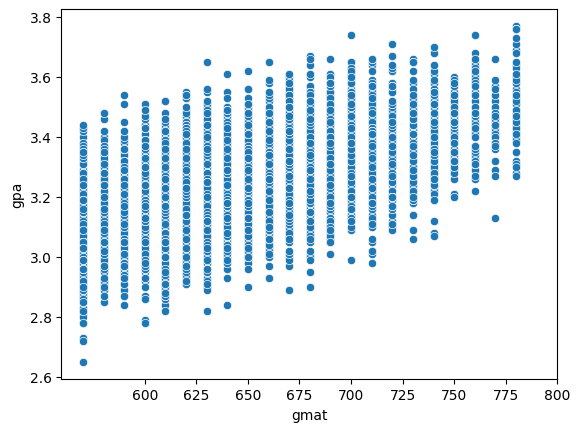

Correlation between gpa and gmat is 0.5775391334190761


In [16]:
#Making scatterplot of gpa and gmat scores
sns.scatterplot(x=df.gmat,y=df.gpa)
plt.xticks(range(600,825,25))
plt.show()

print(f"Correlation between gpa and gmat is {df.gmat.corr(df.gpa)}")

#Inference : There is considerable positive correlation between gpa and gmat, with correlation coefficient of 0.58

#### (2.) Categorical-Numerical variable

(a.) Barplot

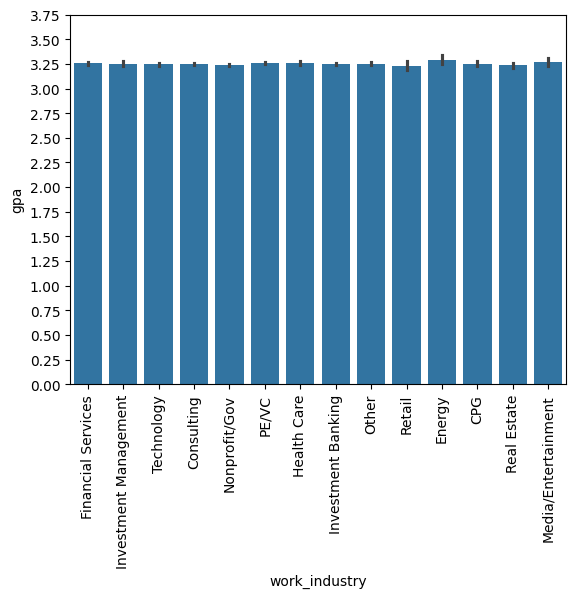

In [17]:
#Bar plot betweeen Major and work_industry :
sns.barplot(x=df.work_industry,y=df.gpa,estimator="mean")
plt.xticks(rotation=90)
plt.yticks(np.arange(0,4.0,0.25))
plt.show()

#Inference : The average gpa are almost equal for applicants from all different work industries.


(b.) Boxplot - Bivariate

[]

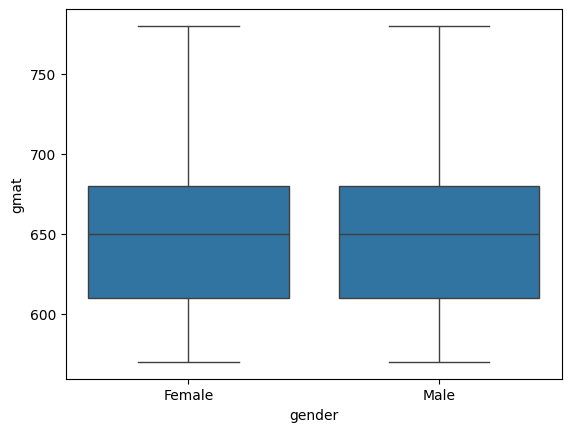

In [18]:
#Boxplot of applicants according to gmat scores; grouped according to gender.
sns.boxplot(x=df.gender, y=df.gmat)
plt.plot()

#Inference : The IQR, median of applicants is almost same for male and female sub-groups.

(c.) Violinplot

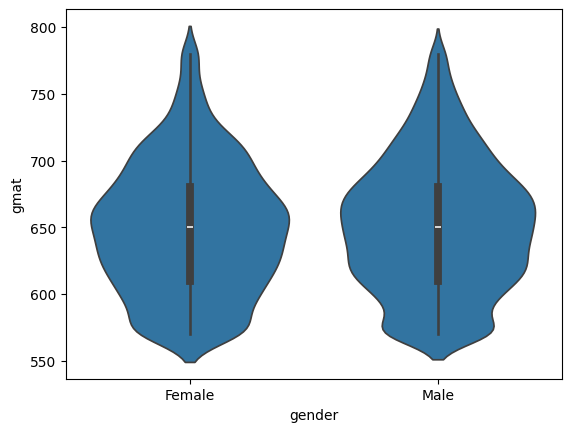

In [19]:
sns.violinplot(x=df.gender, y=df.gmat)
plt.show()

(d.) Z-test

In [20]:
# Will perform z-test on with "gender" and "gmat" of applicants. We do a z-test as number of applicannts >30.
# Also, "gender" has only two groups, hence z-test can be used to test for significant difference in the means of both groups.

A=  df.loc[df["gender"]=="Male", "gmat"]
B = df.loc[df["gender"]=="Female", "gmat"]

z_statistic, p_value = stats.ttest_ind(A,B,equal_var=False)  
#Here, doing equal_var=False ensures that we perform a z-test (aka Welch t-test), not a t-test(equal variance).

print(p_value)

#Inference : Hence, as p_value>0.05 ; so we conclude there is NO significant difference between means of gmat scores of male and female applicants.


0.07163725959346945


(e.) ANOVA Test

In [21]:
#Performing ANOVA Test between "major" and "gmat" of applicants.

a = df.loc[df['major'] == 'Business', 'gmat']
b = df.loc[df['major'] == 'STEM', 'gmat']
c = df.loc[df['major'] == 'Humanities', 'gmat']

f_value,p_value = stats.f_oneway(a,b,c)
print(p_value)

#Inference : As p_value of ANOVA test is >0.05 ; hence we conclude there is NO significant difference between mean gmat scores of groups of different applicants according to their majors.

0.6040658059682896


#### 3. Categorical-Categorical

Heatmap

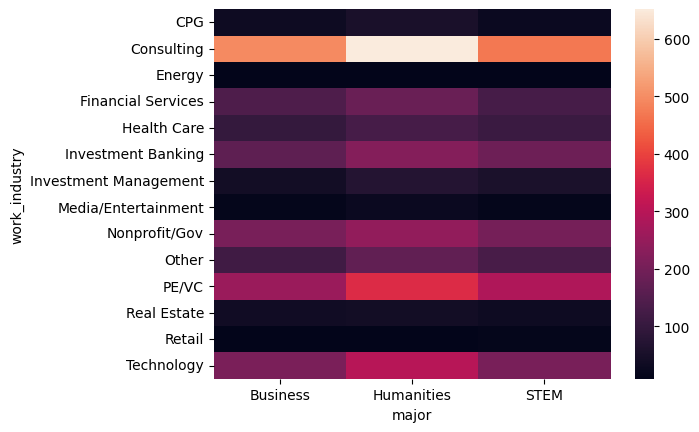

In [22]:
sns.heatmap(pd.crosstab(df.work_industry, df.major))
plt.show()


(b.) Chi-2 Contingency test

In [23]:
#Performing chi2-test between "work industry" and "major" 

chi_2_statistic, p_value, dof, expected_freq = chi2_contingency(pd.crosstab(df.work_industry, df.major) )

print(f"p-value of chi-2 test is {p_value}")

#Inference : p-value >=0.5 
#Hence, we conclude that their is NO SIGNIFICANT association between work_industry and major of applicants.

p-value of chi-2 test is 0.7056503903537898


## Multivariate Analysis

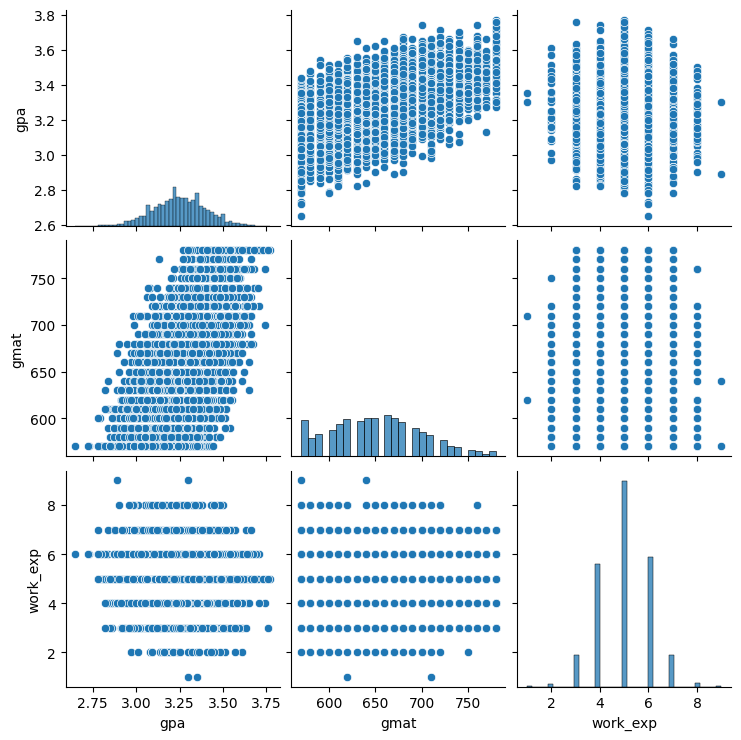

In [24]:
sns.pairplot(df[["gpa","gmat","work_exp"]])
plt.show()